In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [2]:
import pandas as pd

# 세미콜론을 구분자로 사용하여 데이터를 로드하고 열 이름을 지정
df = pd.read_csv("C:/Users/82108/Downloads/student+performance/student/student-mat.csv", sep=';', header=0)

# 결과 확인
print(df.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [3]:
df = df.drop(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], axis=1)

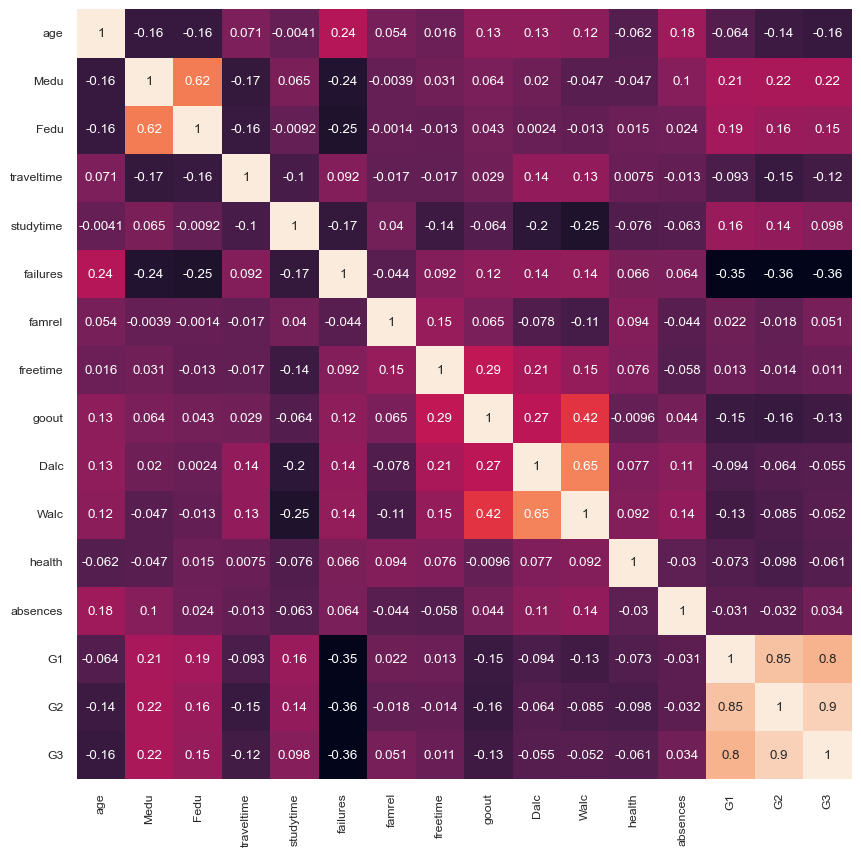

In [4]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
X = df.drop(['age', 'failures', 'goout'], axis=1)
X.head()

,Medu,Fedu,traveltime,studytime,famrel,freetime,Dalc,Walc,health,absences,G1,G2,G3
0,4,4,2,2,4,3,1,1,3,6,5,6,6
1,1,1,1,2,5,3,1,1,3,4,5,5,6
2,1,1,1,2,4,3,2,3,3,10,7,8,10
3,4,2,1,3,3,2,1,1,5,2,15,14,15
4,3,3,1,2,4,3,1,2,5,4,6,10,10


In [7]:
y = df['G3']
y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(316, 13) (316,)
(79, 13) (79,)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 1.0674813300710755e-28
평균제곱근오차 1.0674813300710755e-28
평균제곱근오차 1.0674813300710755e-28


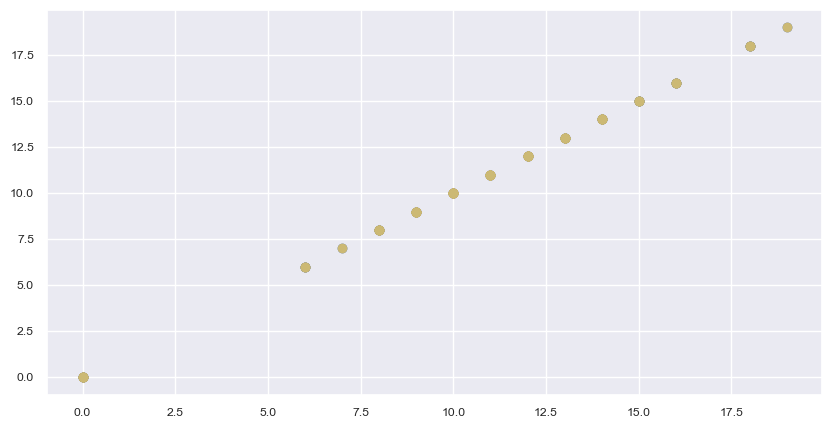

In [10]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['G3'], y_test, label='y_test')
plt.scatter(X_test['G3'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

In [11]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.0


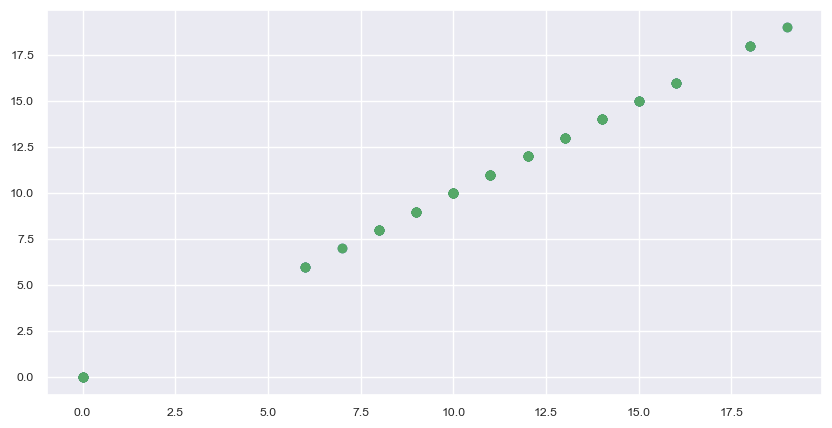

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['G3'], y_test, label='y_test')
plt.scatter(X_test['G3'], dy_preds, c='g', label='dy_preds')
plt.show()         

In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.0001556962025316493


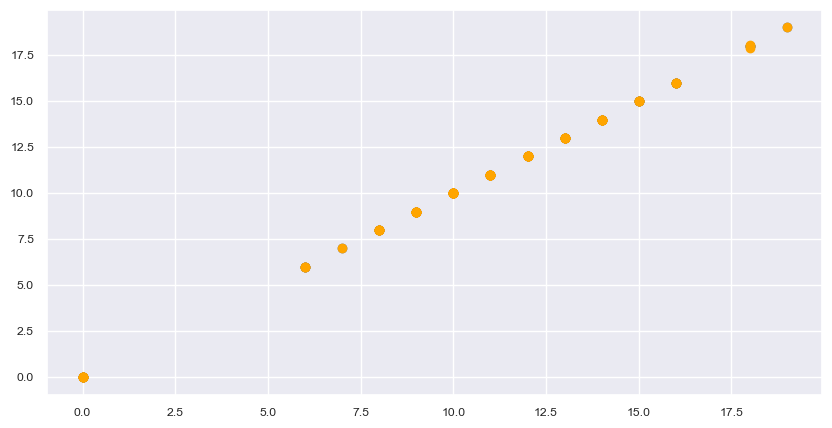

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['G3'], y_test, label='y_test')
plt.scatter(X_test['G3'], ry_preds, c='orange', label='ry_preds')

plt.show()       

In [15]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.004136939007354117


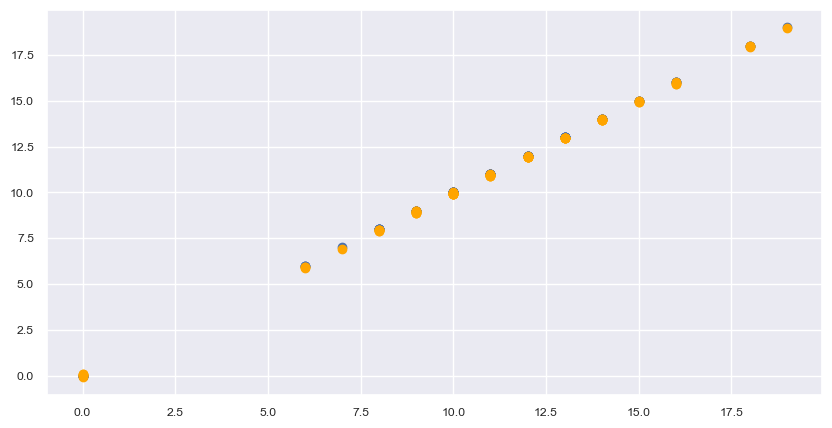

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['G3'], y_test, label='y_test')
plt.scatter(X_test['G3'], ry_preds, c='orange', label='ry_preds')

plt.show()    

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

model = KNeighborsRegressor(n_neighbors=6)  # 예시로 n_neighbors를 5로 설정합니다. 필요에 따라 조정할 수 있습니다.
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)
print('평균제곱근오차:', mean_squared_error(ry_preds, y_test))


평균제곱근오차: 0.2707454289732772


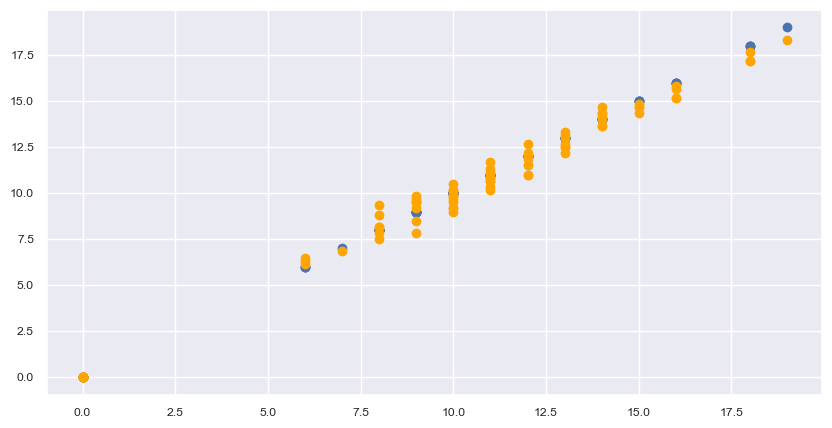

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['G3'], y_test, label='y_test')
plt.scatter(X_test['G3'], ry_preds, c='orange', label='ry_preds')

plt.show()